## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
import scipy.stats as sp
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_metadata = pd.merge(study_results, mouse_metadata, how="left", on= "Mouse ID") 

# Display the data table for preview
study_metadata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
study_metadata["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_metadata_df = study_metadata.copy()
study_metadata_df_df=study_metadata_df[study_metadata_df.duplicated(keep=False)]
study_metadata_df_df["Mouse ID"].unique()



array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
study_metadata_df_df= study_metadata.loc[ study_metadata["Mouse ID"] == "g989", :]
study_metadata_df_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# st_metadata= study_metadata.sort_values(by=['Mouse ID'],ascending=False)
# st_metadata = st_metadata.drop_duplicates()
# st_metadata.head()
st_metadata = study_metadata.loc[study_metadata ["Mouse ID"] != "g989"]
st_metadata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
st_metadata["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_statistics = st_metadata.groupby("Drug Regimen")["Tumor Volume (mm3)"].nunique()
summary_statistics = summary_statistics.to_frame("").sort_index()
summary_statistics["Mean Tumor Volume"] = st_metadata.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summary_statistics["Median Tumor Volume"] = st_metadata.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_statistics["Tumor Volume Variance"] = st_metadata.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_statistics["Tumor Volume Std. Dev."] = st_metadata.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary_statistics["Tumor Volume Std. Err."] = st_metadata.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_statistics




,,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,,
Capomulin,206,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,154,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,154,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,164,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,162,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,157,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,125,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,204,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,158,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = st_metadata[["Drug Regimen",'Tumor Volume (mm3)']]
summary_statistics = summary_statistics.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

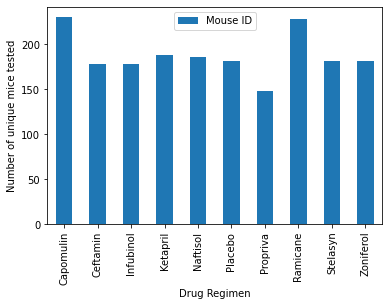

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
pandas_show = pd.DataFrame(st_metadata.groupby(["Drug Regimen"]).count()).reset_index()
pandas_show_df = pandas_show[["Drug Regimen", "Mouse ID"]]
pandas_show_df = pandas_show_df.set_index("Drug Regimen")
pandas_show_df.plot(kind="bar")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of unique mice tested")
plt.show()


([<matplotlib.axis.XTick at 0x15edb2ccc70>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ketapril'),
  Text(2, 0, 'Naftisol'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Stelasyn'),
  Text(5, 0, 'Ramicane'),
  Text(6, 0, 'Zoniferol'),
  Text(7, 0, 'Propriva'),
  Text(8, 0, 'Placebo'),
  Text(9, 0, 'Ceftamin')])

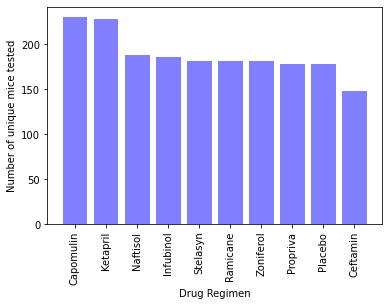

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot
unique_mice = st_metadata["Drug Regimen"].value_counts()
unique_mice
unique_df = st_metadata["Drug Regimen"].unique()
x_axis = np.arange(len(unique_mice))
plt.bar (x_axis, unique_mice, color='b', alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of unique mice tested")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, unique_df, rotation="vertical")


<AxesSubplot:ylabel='Mouse ID'>

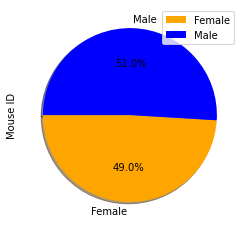

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = pd.DataFrame(st_metadata.groupby(["Sex"]) ["Mouse ID"].count())
gender_df
labels = ["Female", "Male"]
colors = ["orange", "b"]
explode = (0, 0)
gender_df.plot(kind = "pie", y="Mouse ID", explode=explode, labels= labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle= 180)

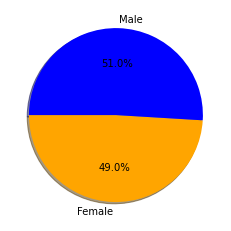

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = st_metadata.groupby("Sex") ["Mouse ID"].count()
gender
colors = ["orange", "b"]
explode = (0, 0)
labels = ["Female", "Male"]
Gender_pie = plt.pie(gender, explode=explode, labels= labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle= 180)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
label= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#Start by getting the last (greatest) timepoint for each mouse
volume = st_metadata.groupby(["Drug Regimen","Mouse ID"]).last()
loop = [b for b in label]
volume_df = [volume['Tumor Volume (mm3)'][loop]]
volume_df_df = pd.DataFrame(volume_df).transpose().reset_index()
volume_df_df.head() 

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
data = pd.merge(st_metadata, volume_df_df, how="outer", on= "Mouse ID") 
data

,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Drug Regimen_x,Sex,Age_months,Weight (g),Drug Regimen_y,Tumor Volume (mm3)_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,Capomulin,38.982878
1,b128,5,45.651331,0,Capomulin,Female,9,22,Capomulin,38.982878
2,b128,10,43.270852,0,Capomulin,Female,9,22,Capomulin,38.982878
3,b128,15,43.784893,0,Capomulin,Female,9,22,Capomulin,38.982878
4,b128,20,42.731552,0,Capomulin,Female,9,22,Capomulin,38.982878
...,...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,Capomulin,28.430964
1876,m601,30,31.758275,1,Capomulin,Male,22,17,Capomulin,28.430964
1877,m601,35,30.834357,1,Capomulin,Male,22,17,Capomulin,28.430964
1878,m601,40,31.378045,1,Capomulin,Male,22,17,Capomulin,28.430964


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list =  ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
tumor_vols = [volume_df_df.loc[volume_df_df['Drug Regimen'] == drug_list[i], 'Tumor Volume (mm3)'] for i in range(4)]
    
    # add subset 
for i in range (4) :
    quartiles = tumor_vols[i].quantile([.25,.5,.75])
    # Determine outliers using upper and lower bounds
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq,2)
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
 
  

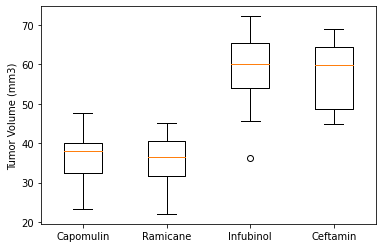

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vols)
plt.setp(ax1, xticks=[1, 2, 3, 4], xticklabels=drug_list)
plt.show()

## Line and Scatter Plots

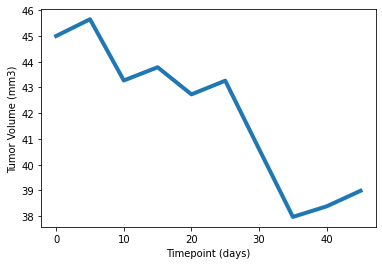

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = st_metadata.loc[st_metadata["Drug Regimen"] == "Capomulin",:]
Capomulin_df_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b128",:]
mouse_treated = Capomulin_df_df["Timepoint"]
tumor_volume =  Capomulin_df_df["Tumor Volume (mm3)"]
plt.plot(mouse_treated, tumor_volume,  linewidth=4)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

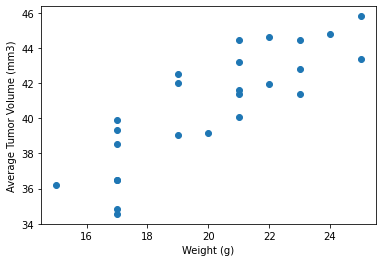

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
st =  st_metadata[ st_metadata['Drug Regimen'] == 'Capomulin']
st_id = st['Mouse ID'].unique()
df = st_metadata.groupby(["Mouse ID"])
avg_vol = pd.Series([df.get_group(i)['Tumor Volume (mm3)'].mean() for i in st_id])
mouse_weight = pd.Series([df.get_group(m)['Weight (g)'].sum()/df.get_group(m)['Weight (g)'].count() for m in st_id])
plt.scatter(mouse_weight, avg_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

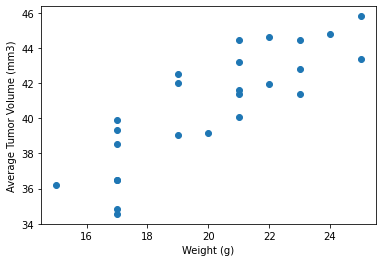

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
y_values = pd.Series([df.get_group(i)['Tumor Volume (mm3)'].mean() for i in st_id])
x_values = pd.Series([df.get_group(m)['Weight (g)'].sum()/df.get_group(m)['Weight (g)'].count() for m in st_id])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
#plt.plot(x_values, y_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
#correlation = st.pearsonr(x_values, y_value [0])
#print(f"The correlation between mouse weight and the average tumor volume is{round(correlation[0],2)}")


In [25]:
plt.tight_layout()
plt.savefig("../Images/avg_state_rain.png")
plt.show()

<Figure size 432x288 with 0 Axes>